# Classifying price range for jewelry

## Capstone Project One: Springboard Data Science Career track

### Notebook by Rupal Gandhre

### Introduction:
The Jewelry industry has a potential to benefit from data and advanced analytics. Many of the retail industry are already leveraging the benefits. These days most of the sales have been through ecommerce websites. Even I have bought jewelry online!!

#### Goal:
The goal of this project is to classify price range for jewelry based on the features of jewelry. The features include

Metal of jewelry (18K Gold, 14K Gold, Sterling Silver)
Type of Stone(Diamond or Gemstones)
Color of the Stone
Cut of the Stone
Carat weight of the Stone
This model may help the client to get a price range for the custom jewelry.

#### The Data:
Data is web-scrapped from one of the leading jewelry brand using BeautifulSoup. I am thankful to the web developers for not implementing a script to block my nuisance of an IP address.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import nan
import json
import re
import seaborn as sns

import statsmodels.api as sm # What does this do? Find out and type here.
from statsmodels.graphics.api import abline_plot # What does this do? Find out and type here.
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error # What does this do? Find out and type here.
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve #  What does this do? Find out and type here.
from sklearn import linear_model, preprocessing # What does this do? Find out and type here.
import warnings # For handling error messages.
# Don't worry about the following two instructions: they just suppress warnings that could occur later. 
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score


#Create label for price
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
#used for expanding the no o viible columns of dataframe



#ignore warning messages to ensure clean outputs
import warnings
warnings.filterwarnings('ignore')

In [2]:
filename = "/Users/rupalgandhre/SpringBoard/DataScience_Capstone2/data/processed/Preprocessing_Gemstone_Rings.csv"
df = pd.read_csv(filename )



In [3]:
df_gemstones = df.drop(columns=['Description', 'Discount_Price', 'Metal',
                                                'Metal_Color', 'Stones','Jewelry_Type',
                                                'Product_Carat', 'Stone1_Desc', 'Price',
                                                'Stone1_Stone','Stone1_Carat','Stone1_Color',
                                                'Stone1_Cut'])

In [4]:
df_gemstones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 60 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Price_Category                        534 non-null    object
 1   Stone1_Stone_Alexandrite              534 non-null    int64 
 2   Stone1_Stone_Amethyst                 534 non-null    int64 
 3   Stone1_Stone_Aquamarine               534 non-null    int64 
 4   Stone1_Stone_Citrine                  534 non-null    int64 
 5   Stone1_Stone_Emerald                  534 non-null    int64 
 6   Stone1_Stone_Garnet                   534 non-null    int64 
 7   Stone1_Stone_Jade                     534 non-null    int64 
 8   Stone1_Stone_Lapis-Lazuli             534 non-null    int64 
 9   Stone1_Stone_Malachite                534 non-null    int64 
 10  Stone1_Stone_Morganite                534 non-null    int64 
 11  Stone1_Stone_Multi-Color        

In [5]:
#df_otherrings[df_otherrings['Stone1_Carat_cat'].isnull()]
#df_otherrings['Stone2_Carat_cat'].fillna(0, inplace=True)
#df_otherrings['Stone1_Carat_cat'].fillna(0, inplace=True)


## Applying the Machine Learning models:


Following classification models are used:
1. Logistic Regression
2. Random Forest
3. Stochastic Gradient Descent
4. K-Nearest Neighbor(KNN)


The model evaluation is based on splitting the data into training and test datasets. 

Since the dataset is not too large, GridSearchCV is used for hyperparameter tuning. GridSearchCV is a library function that is a member of sklearn's model_selection package. It helps to loop through predefined hyperparameters and fit your estimator (model) on your training set. So, in the end, you can select the best parameters from the listed hyperparameters.


Evaluation of the Model is done using Confusion Matrix and Classification Report


In [6]:
#Data is split features and target variable

X = df_gemstones.drop(columns='Price_Category')
y = df_gemstones.Price_Category

#Convert Categorical data to integer data using One Hot Encoding
#df_dummy_rings = pd.get_dummies(X)

#Split your data into testing and training datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=47)
X_train.shape, X_test.shape

((373, 59), (161, 59))

## Logistic Regression For Gemstones dataset

In [7]:
#Define a pipeline comprising the steps:
#SimpleImputer() with a strategy of 'median'
#StandardScaler(),
#LogisticRegression with a random state of 47

from sklearn.linear_model import LogisticRegression


LR_pipe = make_pipeline(
            SimpleImputer(strategy='median'),
            StandardScaler(),
            LogisticRegression(random_state=47))

#Call `cross_validate` to estimate the pipeline's performance.
#Pass it the random forest pipe object, `X_train` and `y_train`,
#and get it to use 3-fold cross-validation
lr_default_cv_results = cross_validate(LR_pipe, X_train, y_train, cv=3)
lr_cv_scores = lr_default_cv_results['test_score']

print("Cross Validation Train Score: ",lr_cv_scores)
print('Mean Cross Validation train score: ', np.mean(lr_cv_scores))
print('Standard deviation CV train score: ', np.std(lr_cv_scores))

Cross Validation Train Score:  [0.384      0.33064516 0.35483871]
Mean Cross Validation train score:  0.35649462365591394
Standard deviation CV train score:  0.021813470482892814


## Hyperparameter tuning for Logistic Regression using GridSearchCV

In [8]:
#from sklearn.model_selection import RepeatedStratifiedKFold

model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
#cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=3, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

#print the best parameters
#for mean, stdev, param in zip(means, stds, params):
#    print("%f (%f) with:%r" % (mean, stdev, param))

Best: 0.375269 using {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


## Fitting the Logistic Regression with the optimal hyperparameters



Train Accuracy Scores:  [0.384      0.34677419 0.37903226]
Mean Cross Validation train score:  0.3699354838709678
Standard deviation CV train score:  0.01650259862444986


Test Accuracy Scores:  [0.33333333 0.33333333 0.33962264]
Mean Cross Validation train score:  0.33542976939203356
Standard deviation CV train score:  0.002964808306861834


Precision Score:  0.2627140554073832
Recall Score: 0.22237965735006207


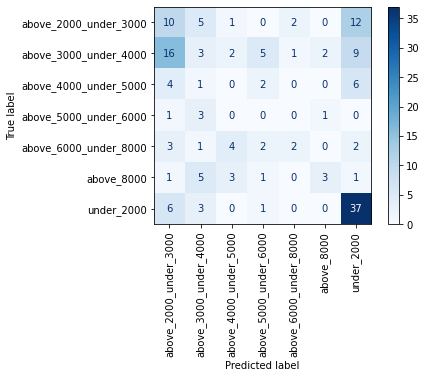



                       precision    recall  f1-score   support

above_2000_under_3000       0.24      0.33      0.28        30
above_3000_under_4000       0.14      0.08      0.10        38
above_4000_under_5000       0.00      0.00      0.00        13
above_5000_under_6000       0.00      0.00      0.00         5
above_6000_under_8000       0.40      0.14      0.21        14
           above_8000       0.50      0.21      0.30        14
           under_2000       0.55      0.79      0.65        47

             accuracy                           0.34       161
            macro avg       0.26      0.22      0.22       161
         weighted avg       0.32      0.34      0.31       161



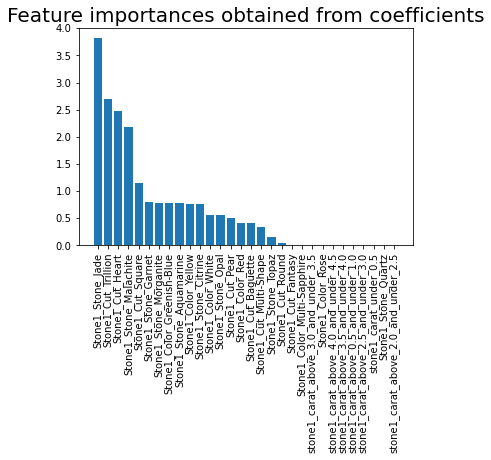

In [9]:
#Use the best parameters found 

logr = LogisticRegression(C=100, penalty= 'l2', solver = 'liblinear')
logr.fit(X_train,y_train)
importances = pd.DataFrame(data={'Attribute':X_train.columns, 'Importance':logr.coef_[0]})
importances = importances.sort_values(by='Importance',ascending=False)

from sklearn.model_selection import cross_val_score

logr_train_scores = cross_val_score(logr,X_train,y_train,cv=3,scoring='accuracy')

print('\n')
print("Train Accuracy Scores: ", logr_train_scores)
print('Mean Cross Validation train score: ', np.mean(logr_train_scores))
print('Standard deviation CV train score: ', np.std(logr_train_scores))

#Predict the test data 
y_pred = logr.predict(X_test)

logr_test_scores = cross_val_score(logr,X_test,y_test,cv=3,scoring='accuracy')
print('\n')
print("Test Accuracy Scores: ", logr_test_scores)
print('Mean Cross Validation train score: ', np.mean(logr_test_scores))
print('Standard deviation CV train score: ', np.std(logr_test_scores))

from sklearn.metrics import precision_score, recall_score

precision_lr = precision_score(y_test, y_pred, average='macro')
recall_lr = recall_score(y_test,y_pred, average='macro')
print('\n')
print('Precision Score: ', precision_lr)
print('Recall Score:', recall_lr)

from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(logr, X_test, y_test,cmap=plt.cm.Blues) 
plt.xticks(rotation=90)
plt.show()

from sklearn.metrics import classification_report

print('\n')
print(classification_report(y_test, y_pred))

plt.bar(x=importances['Attribute'][:30], height=importances['Importance'][:30])
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

## Random Forest Model For Gemstone Dataset

In [10]:
#Define a pipeline comprising the steps:
#SimpleImputer() with a strategy of 'median'
#StandardScaler(),
#RandomForestClassifier with a random state of 47

from sklearn.ensemble import RandomForestClassifier

RF_pipe = make_pipeline(
            SimpleImputer(strategy='median'),
            StandardScaler(),
            RandomForestClassifier(random_state=47))

#Call `cross_validate` to estimate the pipeline's performance.
#Pass it the random forest pipe object, `X_train` and `y_train`,
#and get it to use 3-fold cross-validation
rf_default_cv_results = cross_validate(RF_pipe, X_train, y_train, cv=3)
rf_cv_scores = rf_default_cv_results['test_score']

print("Cross Validation Train Score: ",rf_cv_scores)
print('Mean Cross Validation train score: ', np.mean(rf_cv_scores))
print('Standard deviation CV train score: ', np.std(rf_cv_scores))

Cross Validation Train Score:  [0.368      0.30645161 0.25806452]
Mean Cross Validation train score:  0.3108387096774194
Standard deviation CV train score:  0.044988054837297696


## Hyperparameter tuning for Random Forest using GridSearchCV

In [11]:
#Setting the grid parameters

n_est = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
grid_params = {
        'randomforestclassifier__n_estimators': n_est,
        'randomforestclassifier__criterion': ['entropy','gini'],
        'standardscaler': [StandardScaler(), None],
        'simpleimputer__strategy': ['mean', 'median']
}
#grid_params

#Call `GridSearchCV` with the random forest pipeline, passing in the above `grid_params`
#dict for parameters to evaluate, 3-fold cross-validation, and all available CPU cores (if desired)
rf_grid_cv = GridSearchCV(RF_pipe, param_grid=grid_params, cv=3, n_jobs=-1)

#Call the `GridSearchCV`'s `fit()` method with `X_train` and `y_train` as arguments
#to actually start the grid search. 
rf_grid_cv.fit(X_train, y_train)

#Print the best params (`best_params_` attribute) from the grid search
print('Best Parameters:\n ', rf_grid_cv.best_params_ )

rf_best_cv_results = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, cv=3)
rf_best_scores = rf_best_cv_results['test_score']

print('\n')
print("Cross Validation Train Score: ",rf_best_scores)
print('Mean Cross Validation train score: ', np.mean(rf_best_scores))
print('Standard deviation CV train score: ', np.std(rf_best_scores))

Best Parameters:
  {'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__n_estimators': 183, 'simpleimputer__strategy': 'mean', 'standardscaler': StandardScaler()}


Cross Validation Train Score:  [0.384      0.31451613 0.2983871 ]
Mean Cross Validation train score:  0.3323010752688172
Standard deviation CV train score:  0.03714494612699283


## Fitting the Random Forest Classifier with the optimal hyperparameters



The Accuracy score of Random Forest prediction:  0.35403726708074534
Precision Score:  0.21735000306428878
Recall Score:  0.2162892032512893


                       precision    recall  f1-score   support

above_2000_under_3000       0.29      0.33      0.31        30
above_3000_under_4000       0.22      0.16      0.18        38
above_4000_under_5000       0.00      0.00      0.00        13
above_5000_under_6000       0.00      0.00      0.00         5
above_6000_under_8000       0.00      0.00      0.00        14
           above_8000       0.50      0.21      0.30        14
           under_2000       0.51      0.81      0.63        47

             accuracy                           0.35       161
            macro avg       0.22      0.22      0.20       161
         weighted avg       0.30      0.35      0.31       161



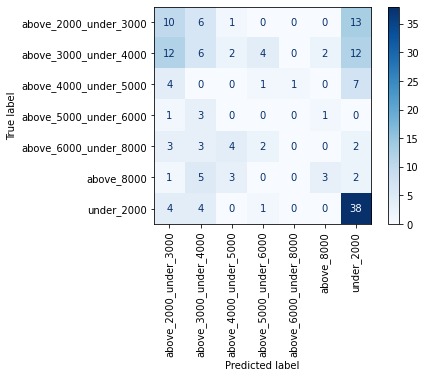

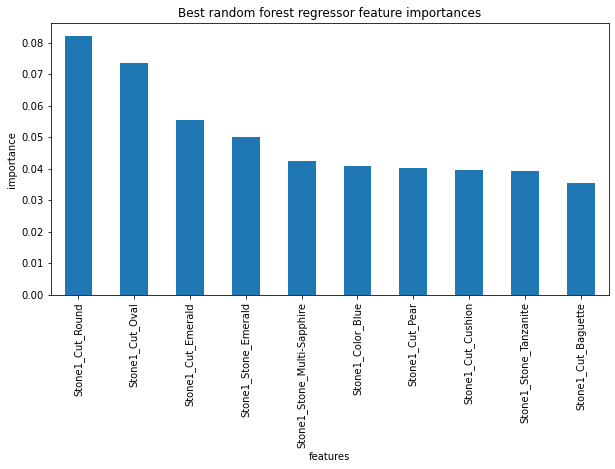

In [12]:
#Predict on the test data

rf_clf = rf_grid_cv.best_estimator_

y_pred_rf = rf_clf.predict(X_test)

precision_rf = precision_score(y_test, y_pred_rf, average='macro')
recall_rf = recall_score(y_test,y_pred_rf, average='macro')
print('\n')
print('The Accuracy score of Random Forest prediction: ',accuracy_score(y_test, y_pred_rf))
print('Precision Score: ', precision_rf)
print('Recall Score: ', recall_rf)

print('\n')
print(classification_report(y_test, y_pred_rf))


plot_confusion_matrix(rf_grid_cv, X_test, y_test,cmap=plt.cm.Blues) 
plt.xticks(rotation=90)
plt.show()


#Plot a barplot of the random forest's feature importances,
#assigning the `feature_importances_` attribute of 
#`rf_grid_cv.best_estimator_.named_steps.randomforestclassifier` to the name `imps` to then
#create a pandas Series object of the feature importances, with the index given by the
#training data column names, sorting the values in descending order
plt.subplots(figsize=(10, 5))
imps = rf_grid_cv.best_estimator_.named_steps.randomforestclassifier.feature_importances_
rf_feat_imps = pd.Series(imps, index=X_train.columns).sort_values(ascending=False)
rf_feat_imps.head(10).plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances');
plt.show()


## Stochastic Gradient Descent (SGD) for Gemstone Dataset

Train Accuracy Scores:  [0.304      0.31451613 0.32258065]
Mean Cross Validation train score:  0.31369892473118277
Standard deviation CV train score:  0.007607494585591996


Test Accuracy Scores:  [0.35185185 0.33333333 0.32075472]
Mean Cross Validation test score:  0.3353133007221057
Standard deviation CV test score:  0.01277231778593549


Precision Score:  0.3184403068123998
Recall Score: 0.25720362397694024


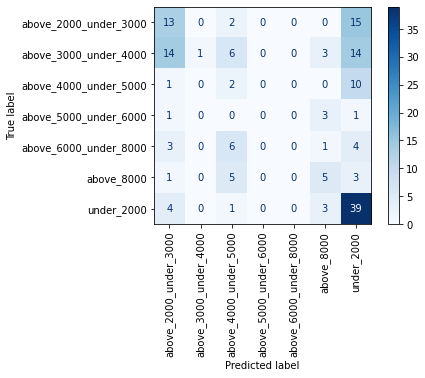



                       precision    recall  f1-score   support

above_2000_under_3000       0.35      0.43      0.39        30
above_3000_under_4000       1.00      0.03      0.05        38
above_4000_under_5000       0.09      0.15      0.11        13
above_5000_under_6000       0.00      0.00      0.00         5
above_6000_under_8000       0.00      0.00      0.00        14
           above_8000       0.33      0.36      0.34        14
           under_2000       0.45      0.83      0.59        47

             accuracy                           0.37       161
            macro avg       0.32      0.26      0.21       161
         weighted avg       0.47      0.37      0.29       161



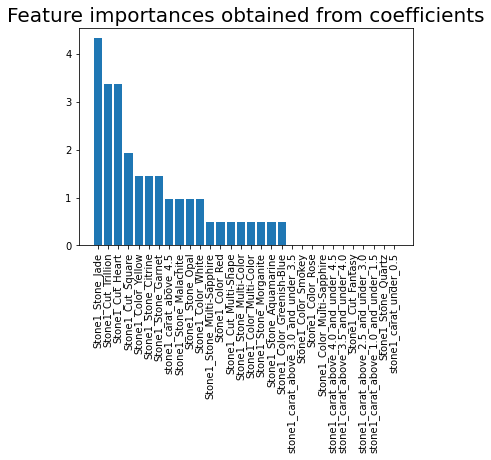

In [13]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()
sgd_clf.fit(X_train, y_train)

sgd_train_scores = cross_val_score(sgd_clf, X_train, y_train, cv=3,scoring='accuracy')

print("Train Accuracy Scores: ", sgd_train_scores)
print('Mean Cross Validation train score: ', np.mean(sgd_train_scores))
print('Standard deviation CV train score: ', np.std(sgd_train_scores))

sgd_test_scores = cross_val_score(sgd_clf, X_test, y_test, cv=3,scoring='accuracy')
print('\n')
print("Test Accuracy Scores: ", sgd_test_scores)
print('Mean Cross Validation test score: ', np.mean(sgd_test_scores))
print('Standard deviation CV test score: ', np.std(sgd_test_scores))

y_pred_sgd = sgd_clf.predict(X_test)

precision_sgd = precision_score(y_test, y_pred_sgd, average='macro')
recall_sgd = recall_score(y_test,y_pred_sgd, average='macro')
print('\n')
print('Precision Score: ', precision_sgd)
print('Recall Score:', recall_sgd)

plot_confusion_matrix(sgd_clf, X_test, y_test,cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.show()
print('\n')
print(classification_report(y_test, y_pred_sgd))

importances_sgd = pd.DataFrame(data={'Attribute':X_train.columns, 'Importance':sgd_clf.coef_[0]})
importances_sgd = importances_sgd.sort_values(by='Importance',ascending=False)

plt.bar(x=importances_sgd['Attribute'][:30], height=importances_sgd['Importance'][:30])
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

## KNeighbors Classifer for  Gemstone Dataset

Train Accuracy Scores:  [0.384      0.34677419 0.32258065]
Mean Cross Validation train score:  0.35111827956989244
Standard deviation CV train score:  0.02526179724039855


Test Accuracy Scores:  [0.27777778 0.25925926 0.30188679]
Mean Cross Validation test score:  0.27964127649662235
Standard deviation CV test score:  0.017452432822744217


Precision Score:  0.2807858807858808
Recall Score: 0.25720362397694024


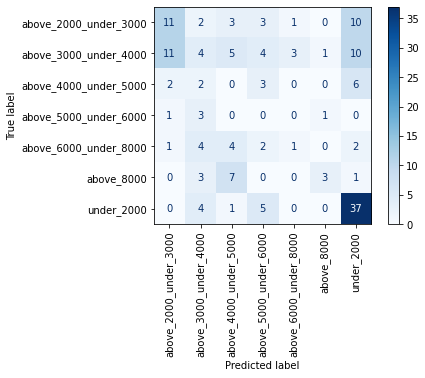



                       precision    recall  f1-score   support

above_2000_under_3000       0.42      0.37      0.39        30
above_3000_under_4000       0.18      0.11      0.13        38
above_4000_under_5000       0.00      0.00      0.00        13
above_5000_under_6000       0.00      0.00      0.00         5
above_6000_under_8000       0.20      0.07      0.11        14
           above_8000       0.60      0.21      0.32        14
           under_2000       0.56      0.79      0.65        47

             accuracy                           0.35       161
            macro avg       0.28      0.22      0.23       161
         weighted avg       0.35      0.35      0.33       161



In [14]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
y_pred_knn = knn_clf.predict(X_test)


knn_train_scores = cross_val_score(knn_clf, X_train, y_train, cv=3,scoring='accuracy')

print("Train Accuracy Scores: ", knn_train_scores)
print('Mean Cross Validation train score: ', np.mean(knn_train_scores))
print('Standard deviation CV train score: ', np.std(knn_train_scores))

knn_test_scores = cross_val_score(knn_clf, X_test, y_test, cv=3,scoring='accuracy')
print('\n')
print("Test Accuracy Scores: ", knn_test_scores)
print('Mean Cross Validation test score: ', np.mean(knn_test_scores))
print('Standard deviation CV test score: ', np.std(knn_test_scores))

y_pred_knn = knn_clf.predict(X_test)

precision_knn = precision_score(y_test, y_pred_knn, average='macro')
recall_knn = recall_score(y_test,y_pred_sgd, average='macro')
print('\n')
print('Precision Score: ', precision_knn)
print('Recall Score:', recall_knn)

plot_confusion_matrix(knn_clf, X_test, y_test,cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.show()
print('\n')
print(classification_report(y_test, y_pred_knn))

## Hyperparameter tuning for KNN using GridSearchCV¶

In [15]:
#Setting the grid parameters

leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
grid_params = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)


#grid_params

#Call `GridSearchCV` with the random forest pipeline, passing in the above `grid_params`
#dict for parameters to evaluate, 3-fold cross-validation, and all available CPU cores (if desired)
knn_grid_cv = GridSearchCV(knn_clf, param_grid=grid_params, cv=3, n_jobs=-1)

#Call the `GridSearchCV`'s `fit()` method with `X_train` and `y_train` as arguments
#to actually start the grid search. 
knn_grid_cv.fit(X_train, y_train)

#Print the best params (`best_params_` attribute) from the grid search
print('Best Parameters:\n ', knn_grid_cv.best_params_ )

knn_best_cv_results = cross_validate(knn_grid_cv.best_estimator_, X_train, y_train, cv=3)
knn_best_scores = knn_best_cv_results['test_score']

print('\n')
print("Cross Validation Train Score: ",knn_best_scores)
print('Mean Cross Validation train score: ', np.mean(knn_best_scores))
print('Standard deviation CV train score: ', np.std(knn_best_scores))

Best Parameters:
  {'leaf_size': 32, 'n_neighbors': 9, 'p': 1}


Cross Validation Train Score:  [0.376      0.34677419 0.39516129]
Mean Cross Validation train score:  0.3726451612903226
Standard deviation CV train score:  0.01989587881337497


## Fitting the KNN Classifier with the optimal hyperparameters



The Accuracy score of KNN prediction:  0.36645962732919257
Precision Score:  0.20867346938775513
Recall Score:  0.2281006467536623


                       precision    recall  f1-score   support

above_2000_under_3000       0.36      0.50      0.42        30
above_3000_under_4000       0.13      0.05      0.08        38
above_4000_under_5000       0.00      0.00      0.00        13
above_5000_under_6000       0.00      0.00      0.00         5
above_6000_under_8000       0.00      0.00      0.00        14
           above_8000       0.43      0.21      0.29        14
           under_2000       0.54      0.83      0.66        47

             accuracy                           0.37       161
            macro avg       0.21      0.23      0.20       161
         weighted avg       0.29      0.37      0.31       161



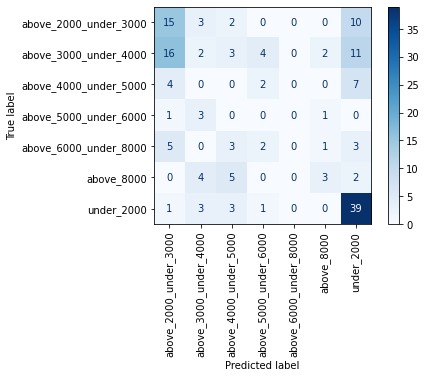

In [16]:
#Predict on the test data

#knn_clf = KNeighborsClassifier('leaf_size': 2, 'n_neighbors': 7, 'p': 1)
knn_clf = knn_grid_cv.best_estimator_

y_pred_knn = knn_clf.predict(X_test)

precision_knn = precision_score(y_test, y_pred_knn, average='macro')
recall_knn = recall_score(y_test,y_pred_knn, average='macro')
print('\n')
print('The Accuracy score of KNN prediction: ',accuracy_score(y_test, y_pred_knn))
print('Precision Score: ', precision_knn)
print('Recall Score: ', recall_knn)

print('\n')
print(classification_report(y_test, y_pred_knn))


plot_confusion_matrix(knn_grid_cv, X_test, y_test,cmap=plt.cm.Blues) 
plt.xticks(rotation=90)
plt.show()


## Comparing the models

In [17]:
Labels = [ 'Logistic Regression','Random Forest','Stochastic Gradient Descent', 'KNN']

precision_test = [precision_lr, precision_rf,precision_sgd,precision_knn]
recall_test =[recall_lr, recall_rf,recall_sgd,recall_knn]


matrix = pd.DataFrame(list(zip(Labels, precision_test, recall_test)), 
               columns =['Algorithm', 'Precision Score', 'Recall score' ]) 
print(matrix)


                     Algorithm  Precision Score  Recall score
0          Logistic Regression         0.262714      0.222380
1                Random Forest         0.217350      0.216289
2  Stochastic Gradient Descent         0.318440      0.257204
3                          KNN         0.208673      0.228101


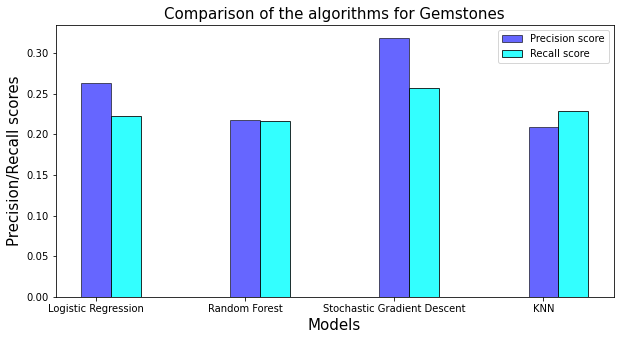

In [18]:
#plotting and comparing ROC-AUC train/test scores:

index=[1,2,3,4]
index_acc=[1.2,2.2,3.2,4.2]
plt.figure(figsize=(10,5))
plt.xlabel('Models',fontsize=15)
plt.ylabel ('Precision/Recall scores',fontsize=15)
plt.title('Comparison of the algorithms for Gemstones',fontsize=15)
_=plt.bar(index, precision_test,color='b',alpha=0.6,label='Precision score',edgecolor='k',width=0.2)
_=plt.bar(index_acc,recall_test,color='cyan',alpha=0.8,label='Recall score',edgecolor='k',width=0.2)

#_=plt.bar(index,precision_test)
plt.xticks([1, 2,3,4], Labels)
plt.legend()
plt.savefig("27.png")
plt.show()

### Save the best model from the pipeline

In [19]:
#Code task 28#
#This may not be "production grade ML deployment" practice, but adding some basic
#information to your saved models can save your bacon in development.
#Just what version model have you just loaded to reuse? What version of `sklearn`
#created it? When did you make it?
#Assign the pandas version number (`pd.__version__`) to the `pandas_version` attribute,
#the numpy version (`np.__version__`) to the `numpy_version` attribute,
#the sklearn version (`sklearn_version`) to the `sklearn_version` attribute,
#and the current datetime (`datetime.datetime.now()`) to the `build_datetime` attribute
#Let's call this model version '1.0'
from sklearn import __version__ as sklearn_version
import datetime
import os 
import pickle


best_model = sgd_clf
best_model.version = '1.0'
best_model.pandas_version = pd.__version__
best_model.numpy_version = np.__version__
best_model.sklearn_version = sklearn_version
best_model.X_columns = [col for col in X_train.columns]
best_model.build_datetime = datetime.datetime.now()

In [20]:
import pickle 

modelpath = "/Users/rupalgandhre/SpringBoard/DataScience_Capstone2/models/gemstones_rings_pricing_model.pkl"
pickle.dump(best_model, open(modelpath, 'wb'))



#### Conclusion:

The classification models were evaluated based on the precision and recall score.
With the currently available dataset,the precision score for Stochastic Gradient Descent is 0.308762 and thus is selected as the best model.
With more diverse and accurate data, the model may predict better results. 

#### Future Work:

The model has a lot of room for improvement.

1.Get more accurate and diverse data for all jewelry types

2.In-depth analysis and modeling was done only for rings. 

3.Data for other jewelry types needs to be analyzed, explored and
    modelled. 

4.Due to limited data available on the product features, predictive sales price could not be done. If available, analyze more financial data to predict the sales of the company. 

